# Hands-on Lab 4: Sensing Part 1
### EECS 16B: Designing Information Devices and Systems II, Spring 2022
Updated by Mia Mirkovic (2020)

Updated by Rafael Calleja (2021)

Updated by Steven Lu, Kaitlyn Chan (2021)

Updated by Steven Lu (2022)


## Table of Contents

* [Part 0: Introduction](#part0)
* [Part 1: Voltage Regulators](#part1)
* [Part 2: Mic Board Circuitry](#part2)
    * [Micboard Setup](#micboard)
    * [Biasing Circuit](#biasing_circuit)
    * [Tuning](#tuning)
    * [Measuring the Frequency Response](#speaker_microphone_frequency_response)


<a id='part0'></a>
# <span style="color:navy">Part 0: Introduction</span>

In the previous lab, you built S1XT33N's legs: the motor controller circuits that enable it to move around and the encoder circuits to sense how far and fast S1XT33N has moved. However, you might have noticed that the range of motion is quite limited when we are using the lab station's DC power supply to power our circuits. We need a portable way to power your circuits so that S1XT33N can freely roam on the ground. Also, our end goal is to have S1XT33N be voice-controlled, and in order to do that, we need a way for S1XT33N to listen to what you're saying.


## Lab Notes
* [Main Lab Note](https://drive.google.com/file/d/1dJl2HHH_0pkXGhI5YnqUOyOZSnKOJKIg/view?usp=sharing)
* [Extra Note](https://drive.google.com/file/d/1qmWS3oT7TZq1YfW-WqmbztxKRXAI5o5T/view?usp=sharing) (optional)

Review the lab note. The lab note provides a technical review of the concepts covered in lab as well as theoretical connections. **You should read the lab notes before your lab section.** They serve as a review and will be helpful as a reference during section.

The extra lab note is optional reading for after you've completed the lab if you are interested in learning more about the electret microphone.


## Pre-Lab

### Complete the pre-lab assignment before doing the lab. For hands-on students, submit your answers to the Gradescope assignment "[Hands-on] Pre-Lab 4: Sensing Part 1". Please make sure that you submit to the correct assignment. Pre-Lab 4 is due on Sunday, February 13 at 11:59pm. No late submissions will be accepted.


## Project Breadboard Layout
In this lab, you will be building voltage regulator circuits that enable us to power our circuits with batteries (a portable voltage source) and S1XT33N's "ears," the mic board circuit that will pick up your voice and convert it into an electrical signal. These circuits correspond to gray regions, the mic board (the green PCB, or printed circuit board, sticking out from the top of the project breadboard), and the green and magenta regions on the project breadboard layout below. **Again, we strongly recommend that you follow this layout as you build the different circuits for S1XT33N.**
<img width="600px" src="images/suggested_layout.jpg">


### Help Request Link: https://links.eecs16b.org/lab-help-sp22

<a id='part1'></a>
# <span style="color:navy">Part 1: Voltage Regulators</span>
-----

Before we build the mic board circuitry, we will first build the regulator circuits to enable portable powering of our circuits. You may have noticed that the only batteries we give you in the kits are 9V batteries, but we need access to both 3.3V and 5V for our circuits to work properly. In most electrical systems, you only have access to one or two main supply voltages (such as 9V from a 9V battery) that often times are not what you need for your circuits. In order to generate specific voltages, you need to build a voltage regulator to "regulate" the supply voltage to what you require. The inner workings of these regulators is beyond the scope of the class, so we will not discuss them in detail, nor build our own. In our kits, we have provided you 2 regulator components that will work so long as you build the necessary circuits around them: the 5V regulator and 3.3V regulator. These components will take the 9V from one of your batteries and generate 5V and 3.3V, respectively.

### Read Part 1 of the [lab note](https://drive.google.com/file/d/1dJl2HHH_0pkXGhI5YnqUOyOZSnKOJKIg/view?usp=sharing) for a review of the voltage regulator circuits you will be building.

### 1.0 Before you begin

**Before you start building your regulators, there are a few MANDATORY project breadboard setup steps you must do.**
1. Your project breadboard's two negative rails must be connected together via a wire. These negative rails will be used for GND and GND only! **<span style="color:red">NEVER connect any non-GND signals to the negative rails. That is the quickest way to ruin your circuits.</span>**
2. Your project breadboard's two positive rails must be connected together via a wire. These positive rails will be used as a 3.3V rail and 3.3V only! **<span style="color:red">NEVER connect any other voltages to the positive rails. That is also a surefire way to ruin your circuits.</span>**

If your project breadboard is not set up like this, we will not help you debug!

### 1.1 Build your 5V regulator
#### Materials
- LM340T5 5V Regulator
- 2x 100nF capacitors (code: 104)

As a helpful tip throughout your labs: **KEEP YOUR CIRCUIT NEAT!** This means you should be reasonably minimizing the space that wires and other electrical components take up on your project breadboard!

**Build the following circuit with the LM340T5 (5V) regulator.** Top view means that the regulator lays flat on your hand with the metal tab touching your palm. **Note that the metal tab on the 5V regulator does not have notches and is thicker.**


|Front View:|Pinout:|Circuit:|
|:-------:|:-----:|:---------------:|
|<img width="100px" src="images/5v.png">|<img width="300px" src="images/LM340T5_po.png">|<img width="400px" src="images/LM340T5_circuit_diagram.png">| 

### 1.2 Test your 5V regulator

**Since we don't have unlimited 9V batteries, we will reserve usage of the batteries for when we need the car to drive around. For this lab, use the DC power supply at your lab station to generate the 9V that you will connect to the `Regulator 9V Rail` instead.**

**<span style="color:red"> IMPORTANT NOTE: If at any point either of your regulators become extremely hot to the touch, IMMEDIATELY turn off the output of your DC power supply! This is a sign that something is wrong in your regulator circuit (i.e. an unintentional short caused by some components' legs touching) and you should debug it before trying again.</span>**

1. Set up your DC power supply to output 9V using the +25V channel. **Remember to set the current limit to 0.1A**, rather than 0.4A like in Lab 3 for the motors!

2. Plug the positive terminal of the channel into a dedicated row on your project breadboard for the 9V for your regulators. In the suggested layout, it is the row labeled `Regulator 9V Rail`. **<span style="color:red">This is different from the row you designated as the 9V rail for your motors (`Motor 9V Rail`)!</span>**
    - We differentiate between the two rows because in future labs, you will be using 2 separate batteries to power your circuits: one for your motors, and one for your regulators. We do this to decouple the motors' power source from the source that the rest of your circuits use.

3. Plug the negative terminal of the channel into your GND rail. **<span style="color:red">This MUST be one of the two negative rails on your project breadboard, which MUST be connected together with a wire!</span>**

4. Connect the output of your 5V regulator to a nearby unoccupied row that will be a dedicated 5V rail. This is labeled `5V Rail` in the suggested layout.

5. Connect the input of your 5V regulator to your dedicated `Regulator 9V Rail`.

6. Using your oscilloscope or multimeter, measure the DC voltage of the `5V Rail` and verify that it is indeed 5V.
    - You probably won't see that the output is exactly 5V due to component imperfections, but it's fine if the output is close enough (between ~4.8V and ~5.2V).

In this lab, the mic board will be powered using this 5V. The Launchpad will also eventually take 5V from the voltage regulator in future labs. We will not be using the Launchpad in this lab, so **<span style="color:red">DO NOT PLUG IN THE 5V OR GND TO YOUR LAUNCHPAD FOR THIS LAB.</span>** 


### 1.3 Build your 3.3V regulator
#### Materials
- LM317KCT 3.3V regulator
- 2x $1 k\Omega$ resistors | (code: brown, black, red, gold)
- $2 k\Omega$ resistor | (code: red, black, red, gold)
- $1.5 k\Omega$ resistor | (code: brown, green, red, gold)

**Layout the following circuit using the LM317KCT (3.3V) regulator.** Top view means that the regulator lays flat on your hand with the metal tab touching your palm. **Note that the metal tab on the 3.3V regulator has notches and is thinner.**

 - **<span style="color:red">Make sure you leave at least 2 rows of space in between your 3.3V and 5V regulators as the metal tabs on the top of the regulator chips are conductive. If these two metal tabs touch, it will cause a short circuit, and your regulators will become extremely hot.</span>**
 - **<span style="color:red">The regulator pinout in the circuit schematic is not the actual pinout of the regulator, as it was drawn to make the schematic cleaner and more readable. Make sure you follow the real pinout in the pinout picture when building your circuit.</span>**


|Front View:|Pinout:|Circuit:|
|:-------:|:-----:|:---------------:|
|<img width="100px" src="images/3v3.png">|<img width="300px" src="images/LM317_po.png">|<img width="400px" src="images/LM317KCT_circuit_diagram_1.png">|

### 1.4 Test your 3.3V regulator

1. Connect the output of your 3.3V regulator to your positive rails.

2. Connect the input of your 3.3V regulator to your dedicated `Regulator 9V Rail`.

3. Using your oscilloscope or multimeter, measure the DC voltage of the positive rail and verify that it is indeed 3.3V.
    - You probably won't see that the output is exactly 3.3V due to component imperfections, but it's fine if the output is close enough (between ~3.2V and ~3.45V).

#### Notes/Tips:
- **Make sure none of your components' legs are touching each other, especially for the 3.3V regulator!** This is one of the most common regulator circuit bugs. Trim down your components so that the risk of this happening in the future is small.
- **Turn off the output of your power supply whenever you're building or moving something around in your circuit, and when you're done testing your regulators.** This minimizes the chance of you causing a short between voltages, which can destroy your circuit and breadboard.


<a id='part2'></a>
# <span style="color:navy">Part 2: Mic Board Circuitry</span>
-----

Now that we've built and tested our regulators, it's time to move on to build and test our mic board circuitry.

### 2.0. Read Part 2 of the [lab note](https://drive.google.com/file/d/1dJl2HHH_0pkXGhI5YnqUOyOZSnKOJKIg/view?usp=sharing) for a review of the mic board and the biasing circuitry you will be building.

<a id='micboard'></a>
### 2.1. Setting up the Mic Board

#### Materials
- Mic board
- Op-amp

<img style="width:250px" src="images/mic_annotated.png">

#### Tasks: 

1. **PLUG IN AN OP AMP INTO THE 8-PIN SOCKET ON YOUR MIC BOARD**. Make sure you plug it in the right way by matching the notch on the op amp chip with the notch in the op amp socket on the mic board!

2. **Plug your micboard _DIRECTLY_ into your project breadboard. No jumper wires!!!**

3. Connect the mic board's `VDD` pin to the `5V Rail` (which is powered by the 5V regulator, which takes its 9V input from the power supply).
    - We connect this to 5V instead of 3.3V (which is the Launchpad's maximum acceptable voltage) because the microphone performs better with 5V. This means that the op amp on the mic board could potentially output a voltage that is >3.3V if it is miswired, so you should **never directly connect the Launchpad to the output of the mic board**. In the next lab, we will be building circuits that go between the mic board output and the Launchpad pin that mitigate this issue.

4. Connect either of the mic board's two `VSS` pins to the ground rail. You need to only connect one of them to your ground rail.

The recommended layout of your project breadboard is reproduced below for your convenience. We suggest you put your mic board near the center of your project breadboard, as you will be building more circuits for the remainder of the lab.
<img style="width:750px" src="images/suggested_layout.jpg">

#### Notes/Tips:

- The top of the op-amp is denoted by the little dot marked in one of the corners.
- **Make sure you've matched the top of the op amp to the notch on the 8-pin socket!**

<a id='biasing_circuit'></a>
### 2.2. Build the Biasing Circuit

#### Materials
- Mic board
- Op-amp A from an op-amp chip
- 2x $10 k\Omega$ resistors | (code: brown, black, orange, gold)
- $100 k\Omega$ resistor | (code: brown, black, yellow, gold)
- 10 uF capacitor (code: 106)

|Biasing Circuit:|Op-Amp Pinout:|
|:-----:|:---------------:|
|<img style="width:500px" src="images/sp21_biasing.png">|<img style="width:500px" src="images/op_amp_pinout.png">| 


#### Tasks:

1. Build the biasing circuit near your mic board on the project breadboard. Use the suggested layout from above as a reference for where to build the circuit.

2. Connect any nodes requiring 3.3V to the 3.3V rails on your project breadboard (the positive rails), which should be powered by your 3.3V regulator from Part 1.

3. Connect the node labeled `HALF_RAIL` to an empty row on your project breadboard.

4. Connect `OS1` on your mic board to the `HALF_RAIL` using a $100k\Omega$ resistor.

5. Connect `OS2` on your mic board to the `HALF_RAIL` using a wire.

6. **Add a 10 uF [decoupling capacitor](https://en.wikipedia.org/wiki/Decoupling_capacitor) between the 3.3V rail (your positive rails) and gnd rail (your negative rails).** This helps reduce high frequency noise and stabilize the voltage fluctuations on the rails (which can occur, for example, when the voltage source must supply a large amount of current across wires which actually have non-zero resistance and inductance).  You should use them in every circuit you build <i>in the future for the rest of your life</i>.

#### Notes/Tips:

- This circuit is giving a low-impedance DC voltage source $\approx \frac{3.3V}{2} = 1.65V$ at the `HALF_RAIL` node to use as reference for our mic board. All our signals passing through the micboard will therefore be centered around 1.65V.

#### Sanity check:
- Pause here and make sure that all of your nodes on the mic board are connected to the correct voltages:
    - VDD = 5V
    - VSS = 0V
    - OS1 = ~1.65V
    - OS2 = ~1.65V
- If any node's voltage is not what you expect it to be, go back and debug your circuits!

## Questions

<span style="color:#075a04"> **2.2.1 What is the purpose of OS1 and OS2?** </span>

_Hint: Read the lab note if you're not sure!_

`YOUR ANSWER HERE`

<a id='tuning'></a>
### 2.3. Tune Your Mic Board

#### Materials:
- Phone speaker or headphones

#### Tasks:
1. Power both of your regulators with 9V using the +25V channel on your DC power supply. Make sure to set the current limit to 0.1A!

2. Connect your oscilloscope probe to `Vout` on your mic board. Make sure you ground the black lead on the probe!

3. Add a **peak-to-peak** measurement for the oscilloscope channel you're using to probe your mic board output. To do this, click the "Meas" button, hit "Add Measurement," and then select the Peak-to-Peak (Vpp) option. Also, set the horizontal time scale to about 5-10 ms.

4.  **Play a pure tone using a [tone generator](https://www.szynalski.com/tone-generator/) in the range (1500 - 2000 Hz)** on your phone at a reasonable volume (leaning towards the soft side). Do NOT use a Youtube video!
    - If the tone generator website is not working for you, you can download a tone generator app onto your phone instead.
    - You'll likely have to unmute your phone for the sound to play.

5.  Make sure to point the speaker (on the bottom right for iPhones) directly at the mic and hold it a few inches away from the mic. 
    - The distance between your speaker and the mic affects the tuning process quite a bit, so **try to keep your speaker at a fixed distance from your mic for the rest of the lab**.

6. Turn the potentiometer on the mic board **(CW: decrease amplitude | CCW: increase amplitude)** using a screwdriver (or your student ID card) until you see a sine wave with a **peak-to-peak of around 2V to 2.5V** on the oscilloscope. **The sine wave should be centered at around 1.65V.**
    - **The potentiometer is a multiturn potentiometer, so you will have to turn it A LOT before you will notice any changes.**

7. Verify that the frequency of the measured sine wave matches the tone from your phone using your oscilloscope by adding a **frequency** measurement. To do this, click the "Meas" button, hit "Add Measurement," and then select the Frequency option.

#### Important Notes:
- With oscillating signals like this, there is an important concept called "railing." We define railing, with regards to this mic board, as non-linear behavior at the boundaries of the output range that results from the op-amp on the mic board being limited by its VDD and VSS, rendering it unable to output the entire output range. If you see flat edges/lines on either the top or bottom of the waveform instead of the smooth peaks and troughs of the sine wave, which happens if you have Vpp $\geq$3.3V, your mic board is railing, and you need to reduce the amplitude of the mic board output. Note that because we set the mic board VDD to 5V, the bottom of the sine wave will rail first, as the sine wave is centered at 1.65V, not the midpoint of the op-amp range of 0-5V.

|Normal/Correct Behavior:|Railing Behavior (AVOID THIS):|
|:-----------:|:-----------:|
|<img style="width:500px" src="images/not_railing.jpg">|<img style="width:500px" src="images/railing.jpg">|

- If you tap on the mic, it should rail, but **it should not be railing while you play the tone.**
- **DO NOT use autoscale on the oscilloscope!** It will not work well with our mic board signal because the signal varies very rapidly. Using autoscale often sets the timescale to a few nanoseconds, which is too small of a timescale to see anything of importance or value for us.

<span style="color:#ba190f">**Congratulations! You have successfully tuned your mic board!**</span>

<a id='speaker_microphone_frequency_response'></a>
### 2.4. Measure the Frequency Response of the Speaker-Microphone System

Now that we've built and tuned our mic board circuits, we now need to characterize the system and determine its performance at various different frequencies of sound, also known as its frequency response, before we use it in the next lab. Finding the frequency response is the best way to know how your system will react to a range of frequencies. Usually this is performed with a linear sweep of every value within the range of frequencies that your system will be tasked with handling, but as this is not feasible for this lab, you will just be testing and measuring values for a finite list of frequencies spread out across the entire range. 

You may think that we are just finding the frequency response of our microphone, but actually we are finding the frequency response of our joint speaker-microphone system. You can think of our system as your speaker (which is playing the pure tones) in series with your microphone (which is receiving the pure tones) and outputting some voltage corresponding to those pure tones. Here we will measure how this cascaded system reacts to certain discrete pure tone frequency inputs to get a general idea of how our speaker-microphone system will react to other frequencies within our range.

You can refer back to these findings for guidance on choosing gains for the amplifiers of your filters later in the next lab (Lab 5: Sensing Part 2).

#### Tasks
1. **Keeping your phone/speaker at a fixed distance from your mic board for all frequencies**, use the oscilloscope to measure the peak-to-peak voltage of the mic board output (`Vout`) at each frequency in the array `freq`. Record these values in the array `Vpp` in the code below and run the code to plot the frequency response of your joint system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from pylab import * 
%matplotlib inline

Vpp =  [0, 0.6, 1, 1.5, 2.3, 4.1, 3.5, 3.1, 5.2, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 4.3]


Text(0, 0.5, 'Gain (Volts/Volts)')

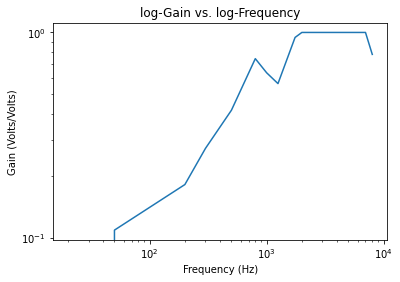

In [3]:
# Record the amplitude of the output sinusoid at each given frequency
freq = [20, 50, 200, 300, 500, 800, 1000, 1250, 1750, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000]

Vpp = [0, 0.6, 1, 1.5, 2.3, 4.1, 3.5, 3.1, 5.2, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 4.3] # Fill in your values here
print("Vpp = ", Vpp)

# We do not have a measurable input signal Vin, so we normalize the maximum of the frequency response to 1.
gain = np.array(Vpp)/max(Vpp)

plt.loglog(freq, gain)
plt.title('log-Gain vs. log-Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volts)')


### <span style="color:red">Save your `Vpp` values somewhere! You will need them in the next lab (Lab 5: Sensing Part 2).

## Questions

<span style="color:#075a04"> **2.4.1. What do you notice about the shape of this function? Which frequencies result in large output?**</span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **2.4.2. What would be the shape of an ideal speaker-microphone system's frequency response?**</span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **2.4.3. What does the plot tell you about the loudness of your speaker at certain frequencies? Does this reflect your experience listening to music?**</span>

Hint: low frequencies correspond to the bass in a song. Try playing something [bass-heavy :)](https://youtu.be/rCuBBaLtXQQ)

`YOUR ANSWER HERE`

<span style="color:#075a04">**2.4.4. Let's say you wanted to flatten out the frequency response of your system such that the gain is around the same across all frequencies. Suggest a way to accomplish this with the circuit elements you learned about in lecture.**</span>

`YOUR ANSWER HERE`

# <span style="color:#ba190f">CHECKOFF</span>
-----
- **Have all questions and plots completed in this notebook.**

- **Show your TA your working circuits:**
    - Demonstrate that both of your regulators work properly.
    - Show the output of your tuned mic board on the oscilloscope.
    - Show your frequency response plot of the speaker-microphone system.

- **Be prepared to answer conceptual questions about the lab.**

### Checkoff Request Link: https://links.eecs16b.org/lab-checkoff-sp22

    
- ### <span style="color:red">DO NOT DISMANTLE ANY CIRCUITS FROM YOUR PROJECT BREADBOARD! You will need them for the rest of the project!</span>

- ### **Remember what each part of your circuit is for (Record this in a Google doc or somewhere else safe). You will need to write summaries for both the midterm and final lab reports!**

- #### **Back up this document (e.g. to Google Drive or Github).**

- If you're interested in learning more about the components we used in this lab, read the [extra reading lab note](https://drive.google.com/file/d/1qmWS3oT7TZq1YfW-WqmbztxKRXAI5o5T/view?usp=sharing).
